<a href="https://colab.research.google.com/github/devssom/data-analysis/blob/main/%EC%A7%80%ED%95%98%EC%B2%A0_%EC%8A%B9%ED%95%98%EC%B0%A8_%EC%9D%B8%EC%9B%90_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지하철 승하차 인원 분석

## 프로젝트 목표
- 승차 또는 하차 시 해당 시간, 해당 역의 승객 수를 확인하기 위해 **개찰구 통과 승객 수** 데이터와 **지하철 위치좌표** 데이터를 활용
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

## 프로젝트 목차
1. **데이터 읽기:** 승하차 인원 정보 데이터를 불러오고 DataFrame 구조를 확인<br>
    1.1. 데이터 불러오기<br>
    1.2. 데이터 확인하기<br>
<br>
2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1. 2021년 6월 승하차 인원만 추출<br>
<br>
3. **데이터 시각화:** 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1. 호선 별 이용객 수 출력<br>
    3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출<br>
    3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력<br>
    3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합<br>
    3.5. 특정 호선의 혼잡 정도를 지도에 출력<br>

## 데이터 출처
- 서울시 지하철 호선별 역별 승하차 인원 정보 데이터: http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

## 프로젝트 개요
코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에 어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면 혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 `서울시 지하철 호선별 역별 승하차 인원 정보` 데이터를 분석하고 `지하철 역 위치 좌표` 데이터를 활용해 특정 호선에서 어떤 역이 가장 혼잡한지 직관적으로 확인해봅시다.

# 1. 데이터 읽기
필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인하기.


### 1.1. 데이터 불러오기

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

먼저, 서울시 지하철 호선별 역별 승하차 인원 정보 데이터를 불러와 `metro_all`에 저장하기.

In [6]:
# pd.read_csv를 통하여 승하차 인원 정보 데이터를 데이터프레임 형태로 읽어오기.
metro_all = pd.read_csv("/content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = 'cp949')

In [7]:
# 승하차 인원 정보 상위 5개 데이터를 출력합니다.
metro_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,12395,18660,24732,16788,22866,15988,21388,17257,22109,20561,21732,21099,20786,22318,19616,23370,18703,24338,17325,23923,17672,22895,18354,15871,19089,12693,12789,13040,10134,11167,10601,2811,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,9703,9194,24921,8022,17333,9687,19292,14091,24305,20089,26186,24776,28141,27144,26643,28360,23213,31119,17744,27036,13759,23606,10098,11006,6510,6119,4409,5485,4265,3405,5689,1035,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,91875,59876,187805,44619,118679,42611,57710,49533,50003,59357,53317,61171,53687,53310,49094,65767,52788,76249,53969,122928,64693,184907,73978,87575,46769,59961,30743,65078,27435,44921,22829,11581,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,62346,7740,167991,8117,72853,9284,29250,14030,27989,15295,25037,18849,24492,23331,20032,30469,17869,36116,15593,66595,16611,135842,17805,46850,8139,38173,4455,39048,4234,28501,3686,4390,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,25745,24583,62999,16472,33400,14689,20639,16427,17238,17625,16913,19712,17440,19363,16063,20684,16772,28784,17481,39357,20038,57642,25012,20823,17529,13880,10932,13378,10102,10189,11809,1952,5451,10,449,0,0,0,0,0,0,20210703


In [8]:
# 승하차 인원 정보 데이터프레임 정보를 요약하여 출력합니다. 
metro_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           45338 non-null  int64 
 1   호선명           45338 non-null  object
 2   지하철역          45338 non-null  object
 3   04시-05시 승차인원  45338 non-null  int64 
 4   04시-05시 하차인원  45338 non-null  int64 
 5   05시-06시 승차인원  45338 non-null  int64 
 6   05시-06시 하차인원  45338 non-null  int64 
 7   06시-07시 승차인원  45338 non-null  int64 
 8   06시-07시 하차인원  45338 non-null  int64 
 9   07시-08시 승차인원  45338 non-null  int64 
 10  07시-08시 하차인원  45338 non-null  int64 
 11  08시-09시 승차인원  45338 non-null  int64 
 12  08시-09시 하차인원  45338 non-null  int64 
 13  09시-10시 승차인원  45338 non-null  int64 
 14  09시-10시 하차인원  45338 non-null  int64 
 15  10시-11시 승차인원  45338 non-null  int64 
 16  10시-11시 하차인원  45338 non-null  int64 
 17  11시-12시 승차인원  45338 non-null  int64 
 18  11시-12시 하차인원  45338 non-null  int64 
 19  12시-

### 1.2. 데이터 확인하기
불러온 두 데이터프레임의 특정 컬럼 데이터를 **중복없이 오름차순 정렬하여** 확인해봅시다.

In [9]:
# metro_all DataFrame 사용월 데이터 확인
# set 함수를 써서 중복제거 -> 리스트로 변환 -> sorted 함수를 사용해서 오름차순으로 정렬

sorted(list(set(metro_all['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106]

In [10]:
# metro_all DataFrame 호선명 데이터 확인
sorted(list(set(metro_all['호선명'])))

['1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '9호선2단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선']

In [11]:
# DataFrame 지하철역 데이터 확인
sorted(list(set(metro_all['지하철역'])))

['4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '광나루',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문',
 '광화문(세종문화회관)',
 '광흥창',
 '광흥창(서강)',
 '교대',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남춘천',
 '남태령',
 '남한산성입구',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',
 '녹양',
 '녹천',
 '논현',

In [12]:
# DataFrame 지하철역 데이터 개수 확인 (지하철역 종류)
len(list(set(metro_all['지하철역'])))

579

# 2. 데이터 정제
데이터를 확인해보니 2015년 1월부터 2021년 6월까지 수집된 데이터인 것을 알 수 있습니다.

이번 프로젝트에서는 가장 최근 한달간 수집된 데이터를 기준으로 특정 호선에서 어떤 역이 가장 혼잡한지 확인하고자 합니다.


### 2.1. 2021년 6월 승하차 인원만 추출
수집된 데이터 중 가장 최근인 6월에 수집한 데이터만 추출하고 불필요한 컬럼을 제거해봅시다.

In [13]:
# 2021년 6월 총 승객수만 추출
metro_recent = metro_all[metro_all['사용월']==202106]
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,12395,18660,24732,16788,22866,15988,21388,17257,22109,20561,21732,21099,20786,22318,19616,23370,18703,24338,17325,23923,17672,22895,18354,15871,19089,12693,12789,13040,10134,11167,10601,2811,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,9703,9194,24921,8022,17333,9687,19292,14091,24305,20089,26186,24776,28141,27144,26643,28360,23213,31119,17744,27036,13759,23606,10098,11006,6510,6119,4409,5485,4265,3405,5689,1035,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,91875,59876,187805,44619,118679,42611,57710,49533,50003,59357,53317,61171,53687,53310,49094,65767,52788,76249,53969,122928,64693,184907,73978,87575,46769,59961,30743,65078,27435,44921,22829,11581,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,62346,7740,167991,8117,72853,9284,29250,14030,27989,15295,25037,18849,24492,23331,20032,30469,17869,36116,15593,66595,16611,135842,17805,46850,8139,38173,4455,39048,4234,28501,3686,4390,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,25745,24583,62999,16472,33400,14689,20639,16427,17238,17625,16913,19712,17440,19363,16063,20684,16772,28784,17481,39357,20038,57642,25012,20823,17529,13880,10932,13378,10102,10189,11809,1952,5451,10,449,0,0,0,0,0,0,20210703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202106,중앙선,원덕,47,1,350,7,653,225,882,535,838,736,851,751,736,974,608,872,591,780,670,362,852,616,914,626,1212,590,801,944,632,742,425,616,242,452,132,583,34,318,2,219,1,61,0,0,0,0,0,0,20210703
604,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,3018,20427,5876,14565,4808,8834,4350,7786,4759,7930,5485,7898,6045,7183,6494,6596,8792,7021,10611,6758,14361,7016,22570,4371,14954,3257,10268,3055,7856,2317,9633,640,4161,9,273,0,0,0,0,0,0,20210703
605,202106,중앙선,지평,0,0,0,0,1,0,377,320,256,312,17,0,319,447,2,2,4,1,82,122,410,313,4,3,3,2,160,155,58,167,222,236,2,3,52,87,13,59,0,0,0,0,0,0,0,0,0,0,20210703
606,202106,중앙선,팔당,2,1,267,132,722,675,1546,1589,1389,2952,1239,3401,1237,3454,1227,2802,1492,2595,1595,1823,2121,1669,2406,1842,2782,1674,2958,1768,2846,1873,2316,1196,2038,799,1585,602,979,540,178,251,0,0,0,0,0,0,0,0,20210703


In [14]:
# 불필요한 작업일자 컬럼 제거
metro_recent = metro_recent.drop(columns={'작업일자'})
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,12395,18660,24732,16788,22866,15988,21388,17257,22109,20561,21732,21099,20786,22318,19616,23370,18703,24338,17325,23923,17672,22895,18354,15871,19089,12693,12789,13040,10134,11167,10601,2811,8211,16,1434,1,1,0,0,0,0
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,9703,9194,24921,8022,17333,9687,19292,14091,24305,20089,26186,24776,28141,27144,26643,28360,23213,31119,17744,27036,13759,23606,10098,11006,6510,6119,4409,5485,4265,3405,5689,1035,2589,4,1348,0,0,0,0,0,0
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,91875,59876,187805,44619,118679,42611,57710,49533,50003,59357,53317,61171,53687,53310,49094,65767,52788,76249,53969,122928,64693,184907,73978,87575,46769,59961,30743,65078,27435,44921,22829,11581,8024,30,637,0,1,0,0,0,0
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,62346,7740,167991,8117,72853,9284,29250,14030,27989,15295,25037,18849,24492,23331,20032,30469,17869,36116,15593,66595,16611,135842,17805,46850,8139,38173,4455,39048,4234,28501,3686,4390,1485,3,92,0,0,0,0,0,0
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,25745,24583,62999,16472,33400,14689,20639,16427,17238,17625,16913,19712,17440,19363,16063,20684,16772,28784,17481,39357,20038,57642,25012,20823,17529,13880,10932,13378,10102,10189,11809,1952,5451,10,449,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202106,중앙선,원덕,47,1,350,7,653,225,882,535,838,736,851,751,736,974,608,872,591,780,670,362,852,616,914,626,1212,590,801,944,632,742,425,616,242,452,132,583,34,318,2,219,1,61,0,0,0,0,0,0
604,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,3018,20427,5876,14565,4808,8834,4350,7786,4759,7930,5485,7898,6045,7183,6494,6596,8792,7021,10611,6758,14361,7016,22570,4371,14954,3257,10268,3055,7856,2317,9633,640,4161,9,273,0,0,0,0,0,0
605,202106,중앙선,지평,0,0,0,0,1,0,377,320,256,312,17,0,319,447,2,2,4,1,82,122,410,313,4,3,3,2,160,155,58,167,222,236,2,3,52,87,13,59,0,0,0,0,0,0,0,0,0,0
606,202106,중앙선,팔당,2,1,267,132,722,675,1546,1589,1389,2952,1239,3401,1237,3454,1227,2802,1492,2595,1595,1823,2121,1669,2406,1842,2782,1674,2958,1768,2846,1873,2316,1196,2038,799,1585,602,979,540,178,251,0,0,0,0,0,0,0,0


# 3. 데이터 시각화
2021년 6월 데이터만 추출한 `metro_recent`를 활용하여 다양한 데이터 시각화 및 혼잡도 분석을 진행해봅시다.

### 3.1. 호선 별 이용객 수 출력
추출한 `metro_recent` 데이터를 활용해 이용객 수가 가장 많은 호선 순으로 막대그래프를 출력해 보겠습니다.

In [15]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

# 실행 순서
# 1. Google Colab 의 노트북에서 위의 코드를 먼저 한번 실행
# 2. 그 후 런타임 다시 시작 
# 3. 다시 위의 코드를 실행
# 4. 그 후 그래프 출력 코드 실행

NanumBarunGothic


In [16]:
# 호선명 컬럼을 기준으로 데이터 평균으로 묶기
metro_line = metro_recent.groupby(["호선명"]).mean().reset_index()
metro_line

,호선명,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,1호선,202106.0,366.300000,8.000000,5813.500000,3558.600000,6760.200000,16527.200000,15481.000000,40058.800000,21904.000000,94382.800000,18108.800000,60340.000000,19977.800000,38162.100000,25860.800000,36784.600000,30605.400000,35908.400000,34015.900000,35247.800000,35737.200000,33068.900000,40279.700000,30985.600000,45303.100000,28261.200000,61866.800000,28445.800000,88731.100000,31390.600000,40164.900000,19544.800000,29409.100000,11159.800000,32004.700000,9701.900000,24617.100000,9628.000000,4367.100000,4328.800000,13.600000,596.800000,0.300000,0.300000,0.100000,0.000000,0.0,0.0
1,2호선,202106.0,234.680000,3.540000,8671.220000,2514.300000,16267.300000,14946.140000,42759.060000,37907.120000,59619.800000,96418.320000,38091.180000,65455.220000,25400.320000,34548.140000,25634.540000,29459.920000,28585.800000,30281.460000,30800.260000,33527.020000,31624.840000,31891.080000,35655.160000,33369.560000,42920.860000,36925.280000,62731.160000,47941.560000,92891.660000,71004.080000,47000.060000,49280.420000,35633.880000,27883.200000,39365.160000,26319.040000,35446.100000,30668.500000,5844.800000,12271.460000,5.660000,704.760000,0.180000,0.180000,0.160000,0.120000,0.0,0.0
2,3호선,202106.0,53.911765,2.558824,4100.058824,1067.941176,9848.588235,10097.941176,25856.852941,24008.352941,30868.970588,49624.705882,19523.441176,34791.823529,15499.382353,21036.352941,15980.735294,18256.058824,17691.352941,18230.411765,18361.647059,19607.117647,19290.705882,18832.294118,22209.882353,19598.058824,26658.941176,21082.529412,36687.235294,25591.852941,48608.411765,35613.235294,25276.352941,25768.470588,19366.117647,14477.352941,18407.529412,12805.411765,15096.617647,13753.352941,2257.558824,5850.676471,3.117647,453.647059,0.058824,0.588235,0.029412,0.029412,0.0,0.0
3,4호선,202106.0,144.153846,4.307692,7265.615385,1289.730769,16421.807692,9961.269231,40458.461538,22896.346154,44537.615385,52690.807692,27547.000000,34788.500000,20835.461538,24188.846154,20574.730769,22360.230769,22603.192308,23034.923077,23315.230769,24224.730769,23930.846154,23876.653846,26443.346154,24943.461538,31439.269231,27285.769231,40050.884615,33737.807692,50169.346154,48643.153846,25126.692308,38961.000000,20119.192308,21800.153846,20476.500000,19449.653846,17040.461538,20395.307692,3140.269231,10060.538462,10.384615,551.038462,0.192308,0.423077,0.000000,0.000000,0.0,0.0
4,5호선,202106.0,15.357143,0.303571,4578.035714,912.017857,10518.892857,6287.678571,29706.785714,16561.250000,33651.035714,38608.267857,16988.375000,19136.553571,12066.303571,11494.660714,11869.410714,11003.553571,12802.214286,11669.857143,12988.517857,12670.678571,12723.875000,12289.357143,14084.946429,13514.160714,17153.089286,15755.071429,23561.071429,20317.732143,33433.196429,32735.089286,14830.107143,24885.642857,11350.875000,13506.071429,11280.553571,12220.142857,9512.517857,13433.339286,1814.410714,6214.357143,4.357143,579.125000,0.000000,0.035714,0.000000,0.017857,0.0,0.0
5,6호선,202106.0,46.410256,0.769231,3792.000000,844.923077,7930.025641,4076.435897,21661.333333,9482.333333,25576.461538,22376.051282,13795.000000,13311.000000,9558.230769,8727.564103,9159.410256,8367.153846,9907.076923,9123.384615,9972.256410,10069.948718,9817.435897,9616.051282,10718.461538,10608.820513,12983.615385,12370.948718,15990.051282,15798.025641,20128.564103,24480.589744,10797.307692,19195.358974,8062.076923,10623.7

위에서 보면, 6월 데이터를 활용하는데, 사용월에 대한 컬럼은 의미가 없으니까 삭제하기. 그리고 이때의 인덱스를 호선명으로 설정

In [17]:
metro_line = metro_line.drop(columns="사용월").set_index("호선명")
metro_line

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
호선명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1호선,366.300000,8.000000,5813.500000,3558.600000,6760.200000,16527.200000,15481.000000,40058.800000,21904.000000,94382.800000,18108.800000,60340.000000,19977.800000,38162.100000,25860.800000,36784.600000,30605.400000,35908.400000,34015.900000,35247.800000,35737.200000,33068.900000,40279.700000,30985.600000,45303.100000,28261.200000,61866.800000,28445.800000,88731.100000,31390.600000,40164.900000,19544.800000,29409.100000,11159.800000,32004.700000,9701.900000,24617.100000,9628.000000,4367.100000,4328.800000,13.600000,596.800000,0.300000,0.300000,0.100000,0.000000,0.0,0.0
2호선,234.680000,3.540000,8671.220000,2514.300000,16267.300000,14946.140000,42759.060000,37907.120000,59619.800000,96418.320000,38091.180000,65455.220000,25400.320000,34548.140000,25634.540000,29459.920000,28585.800000,30281.460000,30800.260000,33527.020000,31624.840000,31891.080000,35655.160000,33369.560000,42920.860000,36925.280000,62731.160000,47941.560000,92891.660000,71004.080000,47000.060000,49280.420000,35633.880000,27883.200000,39365.160000,26319.040000,35446.100000,30668.500000,5844.800000,12271.460000,5.660000,704.760000,0.180000,0.180000,0.160000,0.120000,0.0,0.0
3호선,53.911765,2.558824,4100.058824,1067.941176,9848.588235,10097.941176,25856.852941,24008.352941,30868.970588,49624.705882,19523.441176,34791.823529,15499.382353,21036.352941,15980.735294,18256.058824,17691.352941,18230.411765,18361.647059,19607.117647,19290.705882,18832.294118,22209.882353,19598.058824,26658.941176,21082.529412,36687.235294,25591.852941,48608.411765,35613.235294,25276.352941,25768.470588,19366.117647,14477.352941,18407.529412,12805.411765,15096.617647,13753.352941,2257.558824,5850.676471,3.117647,453.647059,0.058824,0.588235,0.029412,0.029412,0.0,0.0
4호선,144.153846,4.307692,7265.615385,1289.730769,16421.807692,9961.269231,40458.461538,22896.346154,44537.615385,52690.807692,27547.000000,34788.500000,20835.461538,24188.846154,20574.730769,22360.230769,22603.192308,23034.923077,23315.230769,24224.730769,23930.846154,23876.653846,26443.346154,24943.461538,31439.269231,27285.769231,40050.884615,33737.807692,50169.346154,48643.153846,25126.692308,38961.000000,20119.192308,21800.153846,20476.500000,19449.653846,17040.461538,20395.307692,3140.269231,10060.538462,10.384615,551.038462,0.192308,0.423077,0.000000,0.000000,0.0,0.0
5호선,15.357143,0.303571,4578.035714,912.017857,10518.892857,6287.678571,29706.785714,16561.250000,33651.035714,38608.267857,16988.375000,19136.553571,12066.303571,11494.660714,11869.410714,11003.553571,12802.214286,11669.857143,12988.517857,12670.678571,12723.875000,12289.357143,14084.946429,13514.160714,17153.089286,15755.071429,23561.071429,20317.732143,33433.196429,32735.089286,14830.107143,24885.642857,11350.875000,13506.071429,11280.553571,12220.142857,9512.517857,13433.339286,1814.410714,6214.357143,4.357143,579.125000,0.000000,0.035714,0.000000,0.017857,0.0,0.0
6호선,46.410256,0.769231,3792.000000,844.923077,7930.025641,4076.435897,21661.333333,9482.333333,25576.461538,22376.051282,13795.000000,13311.000000,9558.230769,8727.564103,9159.410256,8367.153846,9907.076923,9123.384615,9972.256410,10069.948718,9817.435897,9616.051282,10718.461538,10608.820513,12983.615385,12370.948718,15990.051282,15798.025641,20128.564103,24480.589744,10797.307692,19195.358974,8062.076923,10623.794872,8887.461538,9514

In [18]:
metro_line = metro_recent.groupby(['호선명']).mean().reset_index()
metro_line = metro_line.drop(columns='사용월').set_index('호선명')

# 호선별로 승하차시간별 인원의 평균을 계산한 값들을 (가로로 계산) 내림차순으로 정렬
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)
metro_line

호선명
2호선         29552.172083
1호선         23947.485417
4호선         20141.568910
3호선         16295.797181
경인선         15590.127083
7호선         14675.294118
과천선         13245.239583
경부선         12368.379274
5호선         12265.185268
9호선         11975.280000
8호선         11837.758578
분당선         11460.170238
일산선         10535.026515
안산선         10281.149038
6호선          9052.167735
9호선2~3단계     7755.400641
경원선          7211.668750
공항철도 1호선     7185.709821
중앙선          4819.723214
경의선          4077.887931
우이신설선        3708.809295
수인선          3563.037037
경강선          2911.696970
장항선          2298.986111
경춘선          2289.436404
dtype: float64

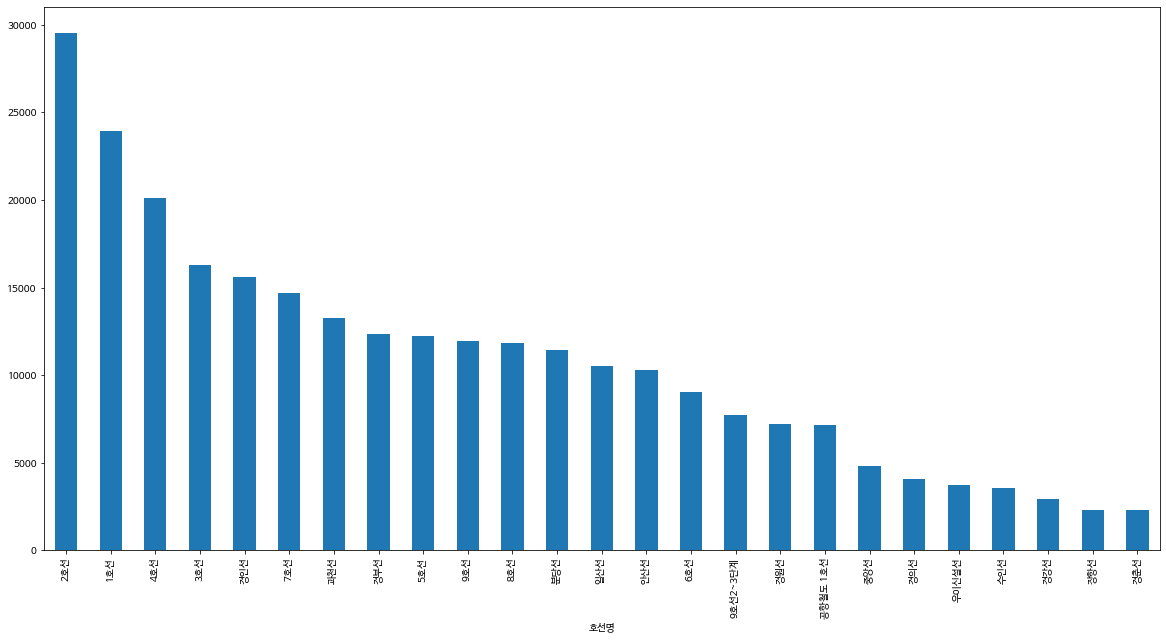

In [20]:
# 막대그래프로 출력
plt.figure(figsize=(20,10))
metro_line.plot(kind=('bar'))
plt.show()

### 3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출
다양한 호선에서 역별 평균 승하차 인원이 많은 역은 어디일까요? 이용객이 가장 많은 2호선 기준으로 확인해봅시다.

In [33]:
line = '2호선'
metro_st = metro_recent.groupby(['호선명', '지하철역']).mean().reset_index() 
metro_st_line2 = metro_st[metro_st['호선명'] == line]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202106,68,5,5634,10898,15798,49800,37686,150575,60412,319617,47444,310538,47162,146907,63593,104498,80198,102420,96731,121091,104901,108102,130240,99570,149359,104024,228834,130644,333597,182063,202589,99888,156402,43968,212344,35446,209363,37493,27475,13686,7,5,0,0,0,0,0,0
11,2호선,강변(동서울터미널),202106,18,0,8295,2136,27343,21465,77995,24424,106012,46063,72448,36699,50860,34309,45540,31714,45801,35111,43734,39567,39557,40686,42320,47913,44565,54097,51506,71481,58456,108021,41062,74801,30584,47900,26850,40695,20304,48963,5206,14835,4,403,1,0,0,0,0,0
12,2호선,건대입구,202106,176,7,14205,2139,20389,19701,52326,26069,88094,61058,58146,47220,33837,36298,31591,37929,36562,46292,39017,52863,39510,53815,44476,59182,54230,70290,66175,97732,79285,144916,56745,94289,57426,49337,82927,45034,81501,50847,11703,22174,15,2442,0,0,0,0,0,0
13,2호선,교대(법원.검찰청),202106,18,1,2366,6923,11842,25344,24154,58254,33988,157982,26824,137549,25349,66113,30985,51410,34406,46562,40404,53373,47657,48092,52623,44124,58677,44462,93206,52592,146869,67556,64550,40034,49050,21605,58044,19337,53655,22696,7841,8012,3,55,0,0,0,0,0,0
14,2호선,구로디지털단지,202106,285,6,40159,5663,52880,22522,134048,85822,183174,268761,109828,152613,60920,57973,54690,43450,59463,44629,61034,51260,55513,50689,57430,60106,70475,70809,126410,103734,236175,162836,109183,125661,61807,76419,56760,75719,49254,89412,7902,36652,0,34,1,1,0,0,0,0
15,2호선,구의(광진구청),202106,50,1,13662,1149,25627,9640,66711,15389,111827,39614,62341,22182,32099,18572,26917,18261,27514,20806,26932,23563,24838,24857,24733,31703,29724,36047,32580,51142,41165,90738,20148,64759,15673,40868,16519,38952,15886,44587,4342,16515,6,1038,0,0,0,0,0,0
16,2호선,낙성대(강감찬),202106,56,0,11657,1942,26007,8488,77510,20099,125167,38509,76944,30811,39332,23826,33589,21550,35687,24991,34536,25891,31855,28381,33446,32751,36243,38821,43151,55950,46497,95878,26218,81237,20440,50982,20718,49182,17056,62294,4231,22418,6,1409,0,0,0,0,0,0
17,2호선,당산,202106,44,4,6576,3109,17276,12432,45774,29933,55760,78083,31967,37339,21461,18344,20442,16913,21169,18874,21111,21079,20485,20677,22033,22902,25602,28613,40176,43049,60343,73469,26398,48000,19514,29505,22644,29942,21194,33814,4488,13350,1,205,0,0,0,0,0,0
18,2호선,대림(구로구청),202106,412,20,34772,3267,29903,11601,65255,24681,91050,56423,61110,34946,33297,28143,27642,28225,30079,27936,29912,29486,27827,29703,28836,37228,33233,41615,41912,58740,52957,72361,26990,52134,18925,34930,16643,44849,12799,50327,3662,17529,2,305,1,0,0,0,0,0
19,2호선,도림천,202106,0,0,263,320,1272,833,3182,4678,3286,6326,2138,2308,1836,1521,1620,1305,2489,1941,1670,1452,2297,1815,2844,1503,3086,1761,2962,2276,4158,2852,1918,2584,950,1506,879,1366,489,1445,151,669,3,50,0,0,0,0,0,0


In [25]:
# 승차 인원 컬럼만 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line2['지하철역']

# 승차인원 첫 번째 컬럼이 3번째 인덱스부터 시작. 3, 5, 7, 9....49    # 승차 전체 컬럼 수 = 24개
for i in range(int((len(metro_recent.columns)-3)/2)):
  metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
metro_get_on = metro_get_on.set_index("지하철역")
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,14시-15시 승차인원,15시-16시 승차인원,16시-17시 승차인원,17시-18시 승차인원,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,68,5634,15798,37686,60412,47444,47162,63593,80198,96731,104901,130240,149359,228834,333597,202589,156402,212344,209363,27475,7,0,0,0
강변(동서울터미널),18,8295,27343,77995,106012,72448,50860,45540,45801,43734,39557,42320,44565,51506,58456,41062,30584,26850,20304,5206,4,1,0,0
건대입구,176,14205,20389,52326,88094,58146,33837,31591,36562,39017,39510,44476,54230,66175,79285,56745,57426,82927,81501,11703,15,0,0,0
교대(법원.검찰청),18,2366,11842,24154,33988,26824,25349,30985,34406,40404,47657,52623,58677,93206,146869,64550,49050,58044,53655,7841,3,0,0,0
구로디지털단지,285,40159,52880,134048,183174,109828,60920,54690,59463,61034,55513,57430,70475,126410,236175,109183,61807,56760,49254,7902,0,1,0,0
구의(광진구청),50,13662,25627,66711,111827,62341,32099,26917,27514,26932,24838,24733,29724,32580,41165,20148,15673,16519,15886,4342,6,0,0,0
낙성대(강감찬),56,11657,26007,77510,125167,76944,39332,33589,35687,34536,31855,33446,36243,43151,46497,26218,20440,20718,17056,4231,6,0,0,0
당산,44,6576,17276,45774,55760,31967,21461,20442,21169,21111,20485,22033,25602,40176,60343,26398,19514,22644,21194,4488,1,0,0,0
대림(구로구청),412,34772,29903,65255,91050,61110,33297,27642,30079,29912,27827,28836,33233,41912,52957,26990,18925,16643,12799,3662,2,1,0,0


In [26]:
# 하차 인원 컬럼만 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line2['지하철역']

# 하차인원 첫 번째 컬럼이 4번째 인덱스부터 시작. 4, 6, 8, 10....50
for i in range(int((len(metro_recent.columns)-3)/2)):
  metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
metro_get_off = metro_get_off.set_index("지하철역")
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,14시-15시 하차인원,15시-16시 하차인원,16시-17시 하차인원,17시-18시 하차인원,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,5,10898,49800,150575,319617,310538,146907,104498,102420,121091,108102,99570,104024,130644,182063,99888,43968,35446,37493,13686,5,0,0,0
강변(동서울터미널),0,2136,21465,24424,46063,36699,34309,31714,35111,39567,40686,47913,54097,71481,108021,74801,47900,40695,48963,14835,403,0,0,0
건대입구,7,2139,19701,26069,61058,47220,36298,37929,46292,52863,53815,59182,70290,97732,144916,94289,49337,45034,50847,22174,2442,0,0,0
교대(법원.검찰청),1,6923,25344,58254,157982,137549,66113,51410,46562,53373,48092,44124,44462,52592,67556,40034,21605,19337,22696,8012,55,0,0,0
구로디지털단지,6,5663,22522,85822,268761,152613,57973,43450,44629,51260,50689,60106,70809,103734,162836,125661,76419,75719,89412,36652,34,1,0,0
구의(광진구청),1,1149,9640,15389,39614,22182,18572,18261,20806,23563,24857,31703,36047,51142,90738,64759,40868,38952,44587,16515,1038,0,0,0
낙성대(강감찬),0,1942,8488,20099,38509,30811,23826,21550,24991,25891,28381,32751,38821,55950,95878,81237,50982,49182,62294,22418,1409,0,0,0
당산,4,3109,12432,29933,78083,37339,18344,16913,18874,21079,20677,22902,28613,43049,73469,48000,29505,29942,33814,13350,205,0,0,0
대림(구로구청),20,3267,11601,24681,56423,34946,28143,28225,27936,29486,29703,37228,41615,58740,72361,52134,34930,44849,50327,17529,305,0,0,0


In [27]:
# 역별 평균 승하차 인원을 구한 후 정수로 형을 변환해서 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line2["지하철역"])
df["평균 승차 인원 수"] = metro_get_on.mean(axis=1).astype(int)    # 평균이라 값이 소수점으로 나오니까 int로 변형
df["평균 하차 인원 수"] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,92076,90468
강변(동서울터미널),34935,34220
건대입구,39514,42484
교대(법원.검찰청),35937,40503
구로디지털단지,66141,66032
구의(광진구청),25803,25432
낙성대(강감찬),30847,29808
당산,21019,24151
대림(구로구청),27800,28518


### 3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력
2호선 기준 6월 한 달간 **강남 > 잠실 > 신림 > 구로디지털단지 > 홍대입구 > 선릉** 순으로 평균 승차 인원이 많았습니다.

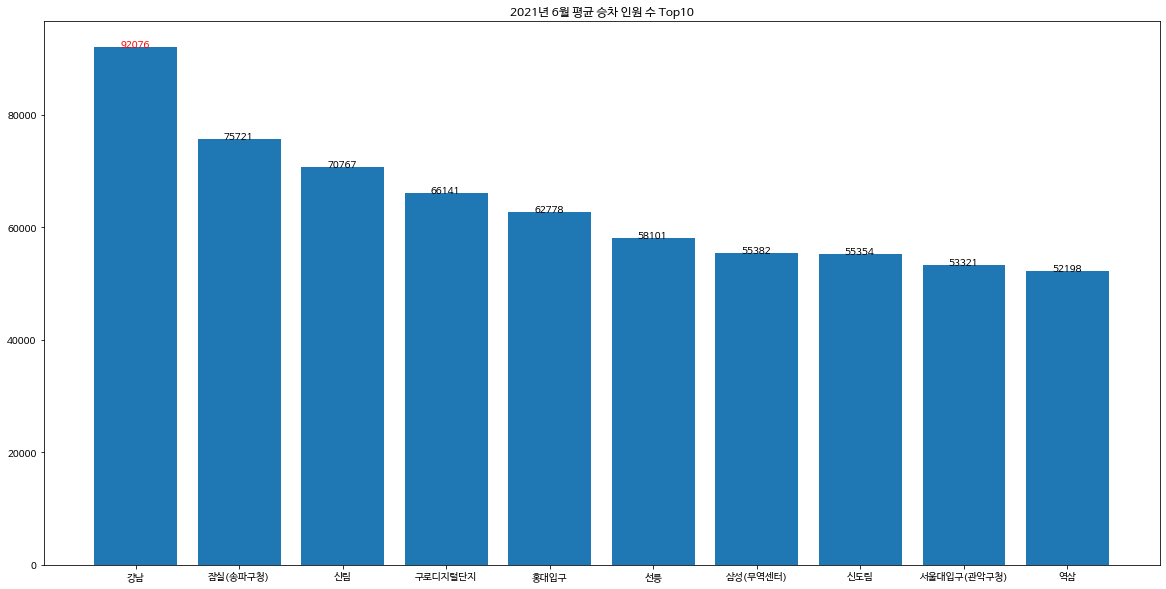

In [28]:
# 승차 인원 수 Top10 
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])    # (가로축, 세로축)
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):    # enumerate(나열하다)
    if x == 0:    # 0번째 인덱스는 가장 큰 값
        plt.annotate(y, (x-0.15, y), color = 'red')    # 강조표시하는 함수 : annotate(값, (x-0.15(좌표이동), y), 컬러 지정)
    else:
        plt.annotate(y, (x-0.15, y))    # 컬러 설정하지 않으면 디폴트는 검정색

plt.title('2021년 6월 평균 승차 인원 수 Top10')
plt.show()

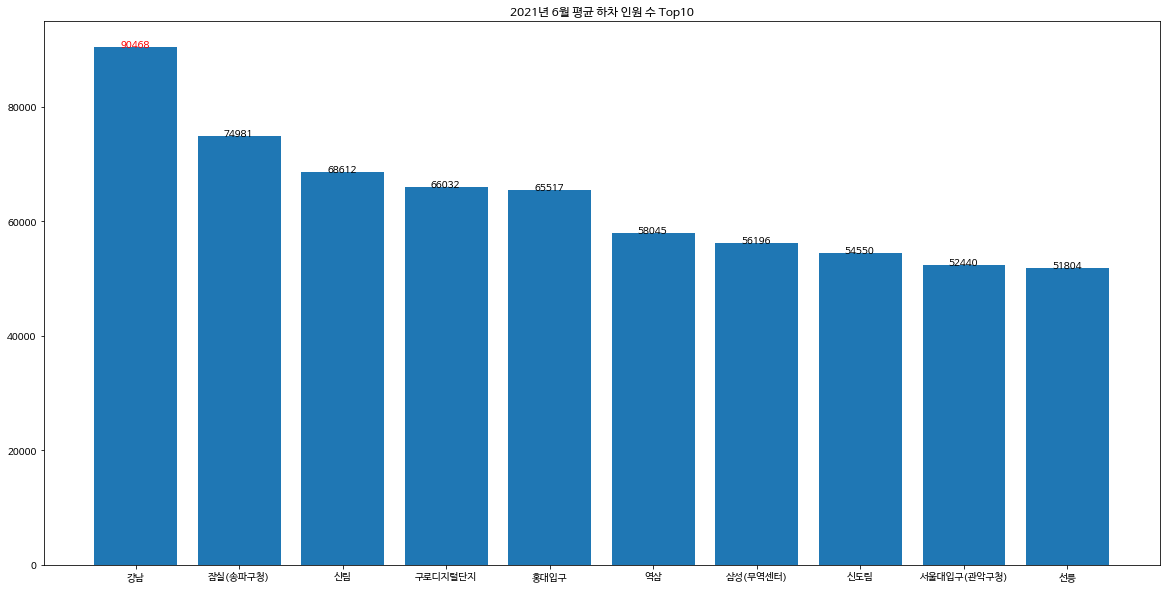

In [29]:
# 하차 인원 수 Top10
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()

### 3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합
특정 호선의 지하철 역 마다 지도에 정보를 출력하기 위해서는 각 위치의 좌표정보가 필요합니다.

카카오 API를 활용하여 csv 파일로 만들어도 됨.

출처:

https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword

https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord


In [32]:
# 지하철 역별 위치좌표에 대한 데이터를 불러옵니다.
subway_location = pd.read_excel('/content/지하철 역 위치 좌표.xlsx')
subway_location

,지하철역,주소,x좌표,y좌표
0,4.19민주묘지역,서울 강북구 우이동 72-182,37.649457,127.013506
1,가능역,경기 의정부시 가능동 197-1,37.747906,127.044358
2,가락시장역,서울 송파구 가락동 184-23,37.492915,127.118215
3,가산디지털단지역,서울 금천구 가산동 468-4,37.482414,126.882240
4,가양역,서울 강서구 가양동 14-61,37.561758,126.853997
...,...,...,...,...
574,회룡역,경기 의정부시 호원동 50-5,37.713908,127.046619
575,회현역,서울 중구 남창동 64-1,37.557688,126.976720
576,회현역,서울 중구 남창동 64-1,37.557688,126.976720
577,효창공원앞역,서울 용산구 효창동 80,37.539622,126.960984


먼저 특정 호선의 역별 평균 승하차 인원 수와 지하철 역별 위치좌표 데이터를 병합하여 데이터프레임을 생성해봅시다.

In [34]:
# 특정 호선의 역별 평균 승하차 인원 수와 지하철 역 위치 좌표를 데이터프레임으로 반환하는 함수입니다.
def get_nums_and_location(line, metro_st):
    
    # 특정 호선의 데이터만 추출합니다.
    metro_line_n = metro_st[metro_st['호선명']== line ]
    
    # 승차 인원 컬럼만 추출합니다.
    metro_get_on = pd.DataFrame()
    metro_get_on['지하철역'] = metro_line_n['지하철역']    # n으로 일반화
    for i in range(int((len(metro_recent.columns)-3)/2)):
        metro_get_on[metro_line_n.columns[3+2*i]] = metro_line_n[metro_line_n.columns[3+2*i]]
    metro_get_on = metro_get_on.set_index('지하철역')
    
    # 하차 인원 컬럼만 추출합니다.
    metro_get_off = pd.DataFrame()
    metro_get_off['지하철역'] = metro_line_n['지하철역']
    for i in range(int((len(metro_recent.columns)-3)/2)):
        metro_get_off[metro_line_n.columns[4+2*i]] = metro_line_n[metro_line_n.columns[4+2*i]]
    metro_get_off = metro_get_off.set_index('지하철역')
    
    # 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장합니다.
    df = pd.DataFrame(index = metro_line_n['지하철역'])
    df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
    df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
    
    # 두 데이터의 지하철역명이 조금 다르기 때문에 지하철역명을 동일하도록 설정합니다.
    # 첫번째 데이터는 () 괄호 안에 부역에 대한 정보가 있었지만, -역으로 끝나지 않습니다.
    temp = []
    df = df.reset_index()    # 인덱스 초기화
    for name in df['지하철역']:
        temp.append(name.split('(')[0]+'역')    # 괄호 앞 부분 까지만 잘라서 사용 + '역' 붙여서
    df['지하철역'] = temp
    
    # 지하철역 명을 기준으로 두 데이터프레임 병합합니다.
    df = df.merge(subway_location, left_on='지하철역', right_on='지하철역')    # 왼쪽 데이터의 기준 컬럼, 오른쪽 데이터의 기준 컬럼
    return df

In [35]:
get_nums_and_location('6호선', metro_st)

,지하철역,평균 승차 인원 수,평균 하차 인원 수,주소,x좌표,y좌표
0,고려대역,8761,8350,서울 성북구 종암동 29-18,37.589679,127.035926
1,고려대역,8761,8350,서울 성북구 종암동 29-18,37.589679,127.035926
2,공덕역,19783,19001,서울 마포구 공덕동 423-29,37.544487,126.951195
3,광흥창역,9772,9385,서울 마포구 창전동 145-17,37.547426,126.932477
4,광흥창역,9772,9385,서울 마포구 창전동 145-17,37.547426,126.932477
5,구산역,8504,6408,서울 은평구 구산동 1,37.611212,126.917182
6,녹사평역,5997,5918,서울 용산구 용산동4가 4,37.534446,126.985525
7,대흥역,8862,9121,서울 마포구 대흥동 128-1,37.547730,126.942379
8,대흥역,8862,9121,서울 마포구 대흥동 128-1,37.547730,126.942379
9,독바위역,3167,3376,서울 은평구 불광동 13-33,37.618377,126.932857


### 3.5. 특정 호선의 혼잡 정도를 지도에 출력
지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [37]:
import folium

# 특정 위도, 경도 중심으로 하는 OpenStreetMap을 출력
map_osm = folium.Map(location = [37.529622, 126.984307], zoom_start=12)   # 쓰인 위도, 경도는 서울시 어느 지점에 대한 위치
map_osm

이제 특정 호선의 역별 평균 승차 인원 수를 원형마커를 통해 지도에 출력해봅시다.

In [40]:
# 특정 호선의 역별 평균 승하차 인원 수와 위치좌표 데이터만 추출합니다.
rail = '6호선'
df = get_nums_and_location(rail, metro_st)

# 서울의 중심에 위치하는 명동역의 위도와 경도를 중심으로 지도 출력합니다.
latitude = subway_location[subway_location['지하철역'] == '명동역']['x좌표']
longitude = subway_location[subway_location['지하철역'] == '명동역']['y좌표']
map_osm = folium.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철 역의 위치별로 원형마커를 지도에 추가합니다.
for i in df.index:
    marker = folium.CircleMarker([df['x좌표'][i],df['y좌표'][i]],
                        radius = (df['평균 승차 인원 수'][i]+1)/3000,    # 값의 반경. 인원 수가 0일 때 계산오류 보정을 위해 +1하고 /3000
                        popup = [df['지하철역'][i],df['평균 승차 인원 수'][i]],    # 팝업으로 뜨는 정보
                        color = 'blue', 
                        fill_color = 'blue')
    marker.add_to(map_osm)

map_osm

AttributeError: ignored